In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [50]:
df1=pd.read_csv("training_dataset.csv")

/var/folders/dn/r5bktzm965zgw_x8d66k0pch0000gn/T/ipykernel_3232/1188196791.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("training_dataset.csv")


In [51]:
df1.shape

(105000, 26)

In [52]:
df1.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [53]:
df1.dtypes

ID                            int64
Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Jobs_Created                  int64
Year_Of_Commitment           object
Guaranteed_Approved _Loan    object
Borrower_Name                object
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
ChargedOff_Amount            object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance         object
Count_Employees               int64
Classification_Code           int64
Loan_Approved_Gross          object
Gross_Amount_Disbursed       object
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
Default                       int64
dtype: object

In [54]:
df1.columns = df1.columns.str.strip()

In [55]:
df1.isnull().sum()

ID                             0
Date_Of_Disbursement         235
Business                      15
Jobs_Reatained                 0
Jobs_Created                   0
Year_Of_Commitment             0
Guaranteed_Approved _Loan      0
Borrower_Name                  3
Low_Documentation_Loan       367
Demography                     0
State_Of_Bank                  0
ChargedOff_Amount              0
Borrower_City                  0
Borrower_State                 0
Gross_Amount_Balance           0
Count_Employees                0
Classification_Code            0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Commitment_Date                0
Primary_Loan_Digit             0
Code_Franchise                 0
Name_Of_Bank                   0
Revolving_Credit_Line        491
Default                        0
dtype: int64

In [56]:
df1=df1.drop(["ID","Jobs_Reatained","Code_Franchise","Count_Employees",'Jobs_Created',"Borrower_Name","Name_Of_Bank","Borrower_City","Borrower_State","State_Of_Bank","Gross_Amount_Balance"],axis=1)

In [57]:
df1["Year_Of_Commitment"]=pd.to_numeric(df1["Year_Of_Commitment"],errors='coerce')

In [58]:
df1["Commitment_Date"]=pd.to_datetime(df1["Commitment_Date"],errors='coerce')

/var/folders/dn/r5bktzm965zgw_x8d66k0pch0000gn/T/ipykernel_3232/2425501934.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["Commitment_Date"]=pd.to_datetime(df1["Commitment_Date"],errors='coerce')


In [59]:
df1["Date_Of_Disbursement"]=pd.to_datetime(df1["Date_Of_Disbursement"],errors='coerce')

/var/folders/dn/r5bktzm965zgw_x8d66k0pch0000gn/T/ipykernel_3232/3762999333.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["Date_Of_Disbursement"]=pd.to_datetime(df1["Date_Of_Disbursement"],errors='coerce')


In [60]:
df1["Processing_Time_Days"]=(df1["Date_Of_Disbursement"]-df1["Commitment_Date"]).dt.days

In [61]:
df1=df1.dropna(subset=['Processing_Time_Days','Business'])

In [62]:
df1=df1.drop(["Date_Of_Disbursement","Year_Of_Commitment","Commitment_Date"],axis=1)

In [63]:
df1['Low_Documentation_Loan'].fillna(df1['Low_Documentation_Loan'].mode()[0],inplace=True)

/var/folders/dn/r5bktzm965zgw_x8d66k0pch0000gn/T/ipykernel_3232/431298642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Low_Documentation_Loan'].fillna(df1['Low_Documentation_Loan'].mode()[0],inplace=True)


In [64]:
df1['Revolving_Credit_Line'].fillna(df1['Revolving_Credit_Line'].mode()[0],inplace=True)

/var/folders/dn/r5bktzm965zgw_x8d66k0pch0000gn/T/ipykernel_3232/112582909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Revolving_Credit_Line'].fillna(df1['Revolving_Credit_Line'].mode()[0],inplace=True)


In [65]:
df1['Loan_Term'] = pd.to_numeric(df1['Loan_Term'], errors='coerce')

In [66]:
def clean_currency_column(column):
    return (
        column.astype(str).str.replace(r"[^\d.]","",regex=True).str.replace(r"^\.","",regex=True).str.replace(r"\.$","",regex=True).astype(float))

In [67]:
df1["Loan_Approved_Gross"]=clean_currency_column(df1["Loan_Approved_Gross"])

In [68]:
df1["Gross_Amount_Disbursed"]=clean_currency_column(df1["Gross_Amount_Disbursed"])

In [69]:
df1["ChargedOff_Amount"]=clean_currency_column(df1["ChargedOff_Amount"])

In [70]:
df1["Guaranteed_Approved _Loan"]=clean_currency_column(df1["Guaranteed_Approved _Loan"])

In [71]:
df1.dtypes

Business                      object
Guaranteed_Approved _Loan    float64
Low_Documentation_Loan        object
Demography                    object
ChargedOff_Amount            float64
Classification_Code            int64
Loan_Approved_Gross          float64
Gross_Amount_Disbursed       float64
Loan_Term                      int64
Primary_Loan_Digit             int64
Revolving_Credit_Line         object
Default                        int64
Processing_Time_Days         float64
dtype: object

In [72]:
df1.isnull().sum()

Business                     0
Guaranteed_Approved _Loan    0
Low_Documentation_Loan       0
Demography                   0
ChargedOff_Amount            0
Classification_Code          0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Loan_Term                    0
Primary_Loan_Digit           0
Revolving_Credit_Line        0
Default                      0
Processing_Time_Days         0
dtype: int64

In [73]:
df1.shape

(104750, 13)

# Treatment Of Outliers

<Axes: ylabel='Loan_Term'>

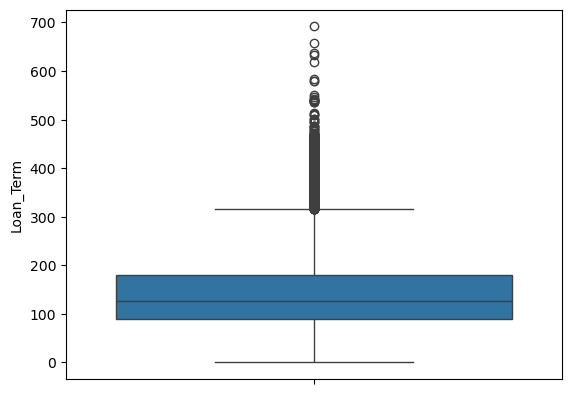

In [74]:
sns.boxplot(df1['Loan_Term'])

In [75]:
q1=df1['Loan_Term'].quantile(0.25)

q3=df1['Loan_Term'].quantile(0.75)

iqr=q3-q1

lower_bound=q1-1.5*iqr

upper_bound=q3+1.5*iqr

df1=df1[(df1['Loan_Term']>=lower_bound) & (df1['Loan_Term']<=upper_bound)]

<Axes: ylabel='Loan_Term'>

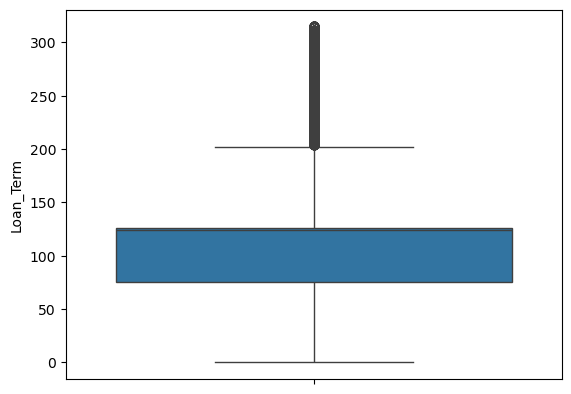

In [76]:
sns.boxplot(df1["Loan_Term"])

<Axes: ylabel='Guaranteed_Approved _Loan'>

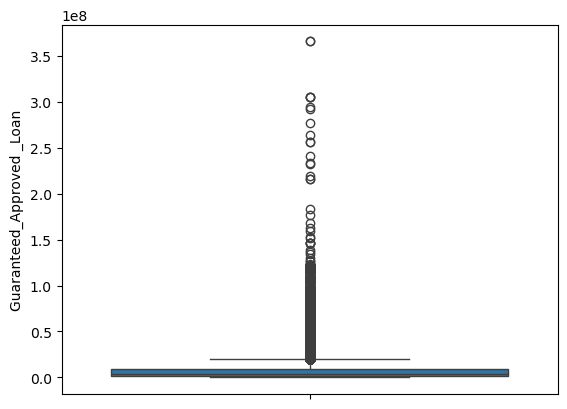

In [77]:
sns.boxplot(df1['Guaranteed_Approved _Loan'])

<Axes: ylabel='ChargedOff_Amount'>

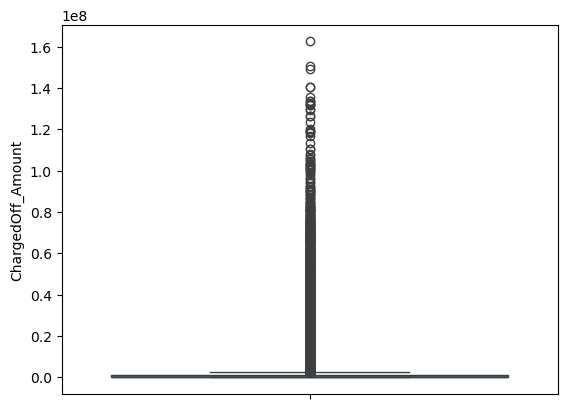

In [78]:
sns.boxplot(df1['ChargedOff_Amount'])

In [79]:
columns_to_cap=["ChargedOff_Amount","Guaranteed_Approved _Loan"]

In [80]:
for col in columns_to_cap:
  q1=df1[col].quantile(0.25)
  q3=df1[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df1[col]=df1[col].clip(lower=lower_bound,upper=upper_bound)

<Axes: ylabel='Guaranteed_Approved _Loan'>

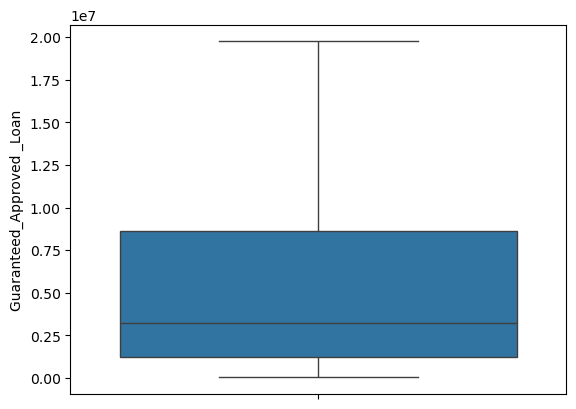

In [81]:
sns.boxplot(df1['Guaranteed_Approved _Loan'])

<Axes: ylabel='ChargedOff_Amount'>

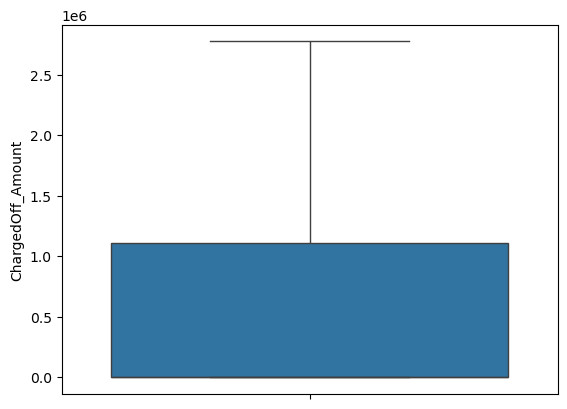

In [82]:
sns.boxplot(df1['ChargedOff_Amount'])

<Axes: ylabel='Processing_Time_Days'>

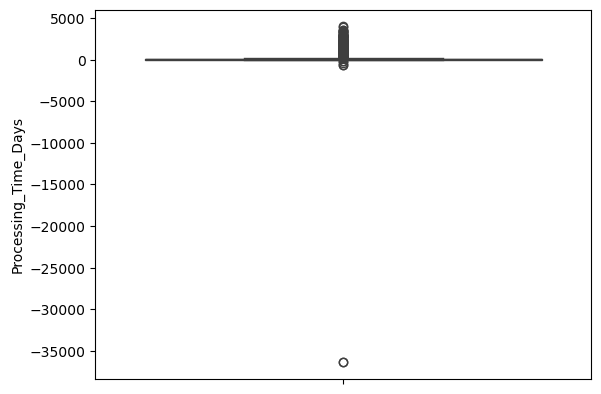

In [83]:
sns.boxplot(df1['Processing_Time_Days'])

In [84]:
mean_value=df1[df1["Processing_Time_Days"]>=0]["Processing_Time_Days"].mean()
df1["Processing_Time_Days"]=df1["Processing_Time_Days"].apply(lambda x:x if x>=0 else mean_value)

In [85]:
q1=df1['Processing_Time_Days'].quantile(0.25)

q3=df1['Processing_Time_Days'].quantile(0.75)

iqr=q3-q1

lower_bound=q1-1.5*iqr

upper_bound=q3+1.5*iqr

df1=df1[(df1['Processing_Time_Days']>=lower_bound) & (df1['Processing_Time_Days']<=upper_bound)]

<Axes: ylabel='Processing_Time_Days'>

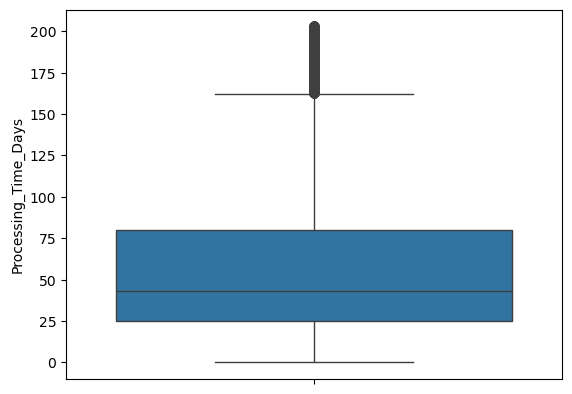

In [86]:
sns.boxplot(df1['Processing_Time_Days'])

<Axes: ylabel='ChargedOff_Amount'>

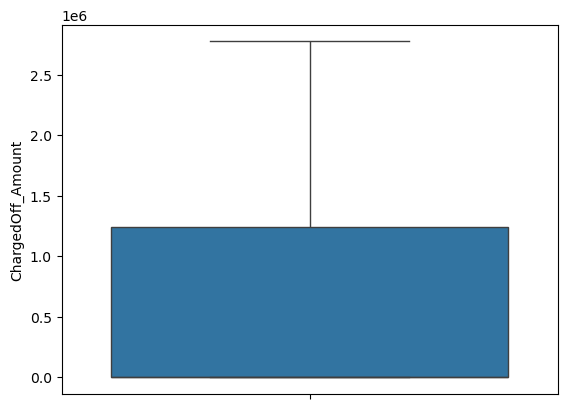

In [87]:
sns.boxplot(df1["ChargedOff_Amount"])

<Axes: ylabel='Classification_Code'>

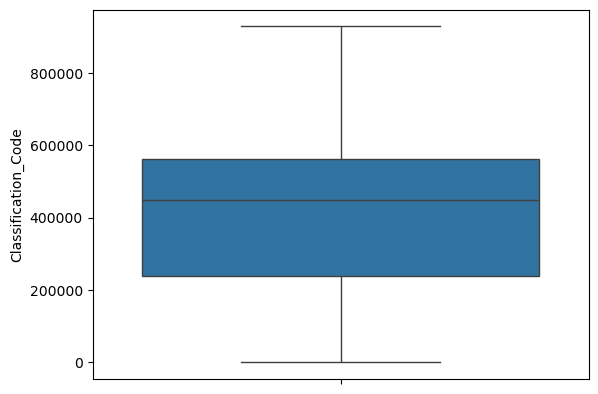

In [88]:
sns.boxplot(df1["Classification_Code"])

<Axes: ylabel='Guaranteed_Approved _Loan'>

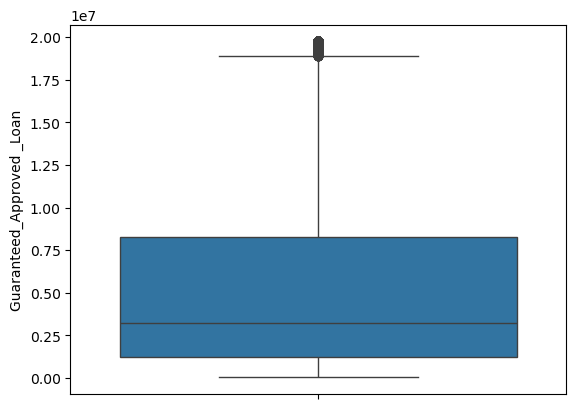

In [89]:
sns.boxplot(df1["Guaranteed_Approved _Loan"])

In [90]:
q1=df1['Guaranteed_Approved _Loan'].quantile(0.25)

q3=df1['Guaranteed_Approved _Loan'].quantile(0.75)

iqr=q3-q1

lower_bound=q1-1.5*iqr

upper_bound=q3+1.5*iqr

df1=df1[(df1['Guaranteed_Approved _Loan']>=lower_bound) & (df1['Guaranteed_Approved _Loan']<=upper_bound)]

<Axes: ylabel='Guaranteed_Approved _Loan'>

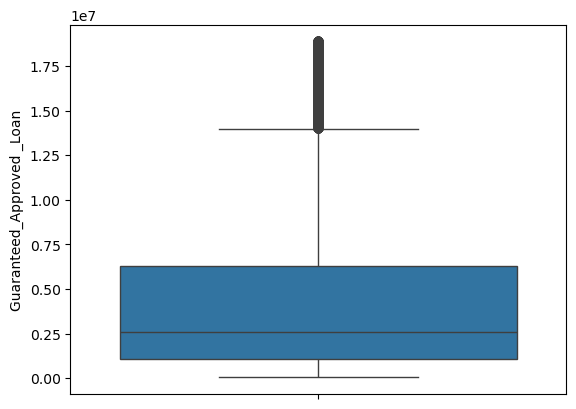

In [91]:
sns.boxplot(df1["Guaranteed_Approved _Loan"])

# Visualization

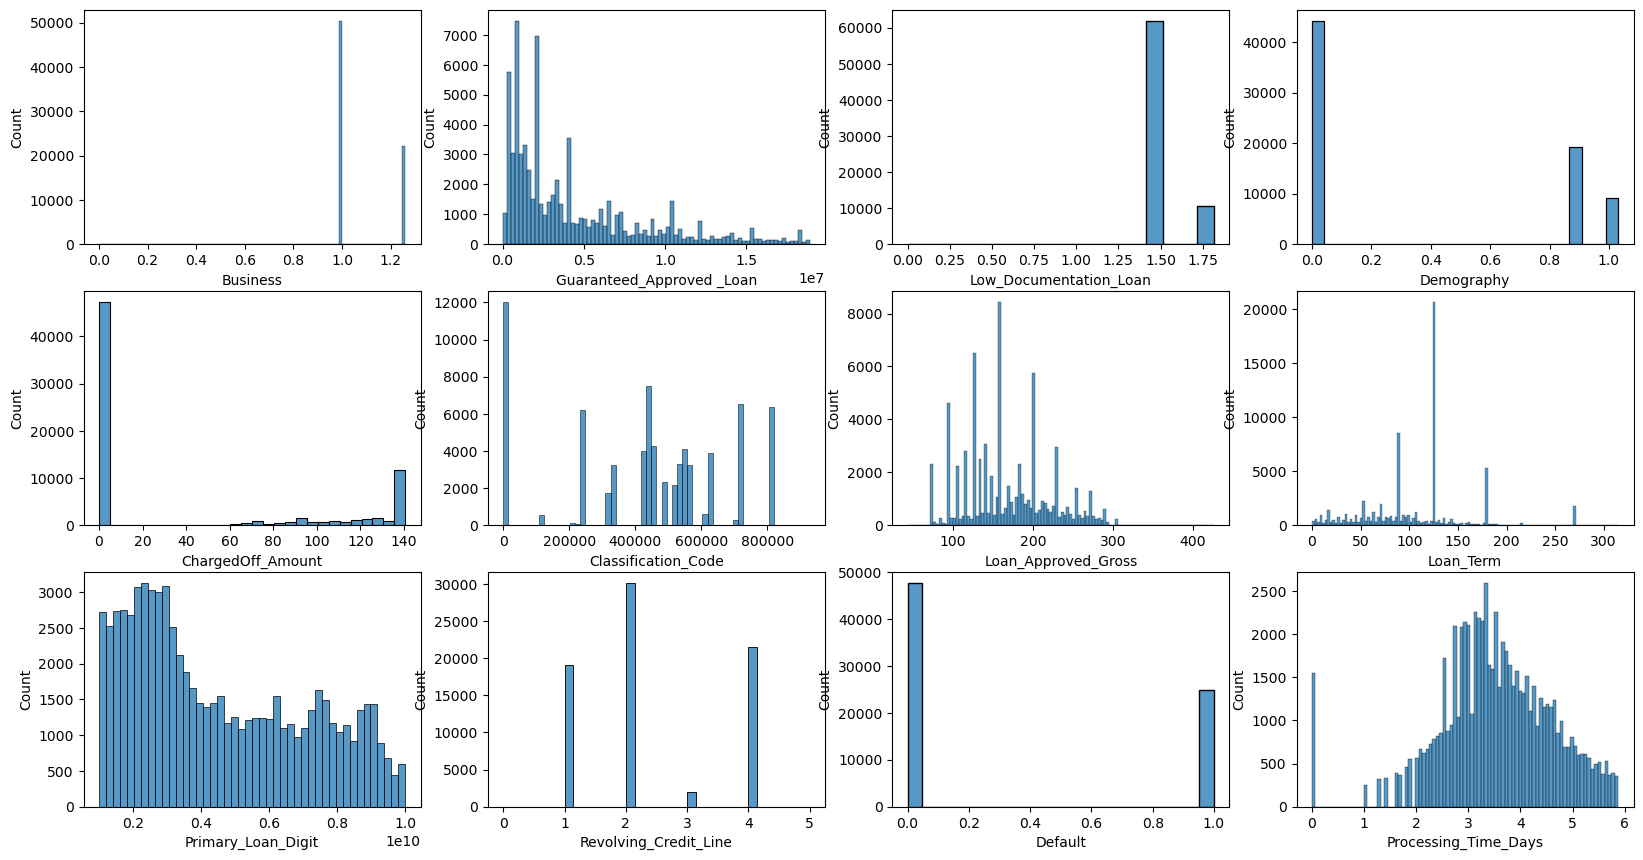

In [175]:
plt.figure(figsize=(20, 14))
for i, column in enumerate(df1.select_dtypes(include='number'),1):
    plt.subplot(4,4,i)
    sns.histplot(df1[column])

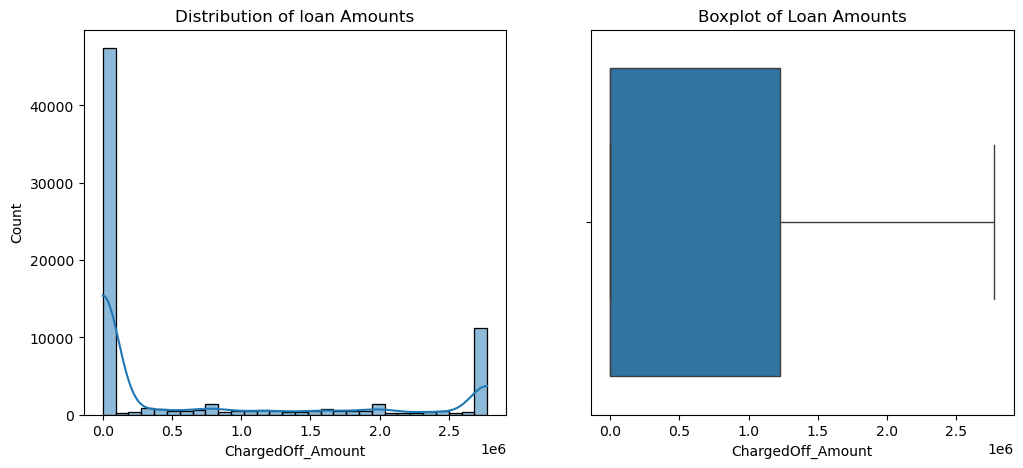

In [93]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df1['ChargedOff_Amount'],bins=30,kde=True)
plt.title("Distribution of loan Amounts")
plt.subplot(1,2,2)
sns.boxplot(x=df1["ChargedOff_Amount"])
plt.title("Boxplot of Loan Amounts")
plt.show()

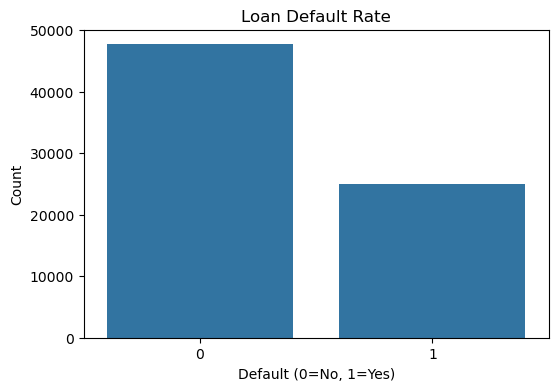

In [94]:
plt.figure(figsize=(6,4))
sns.countplot(x=df1["Default"])
plt.title("Loan Default Rate")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

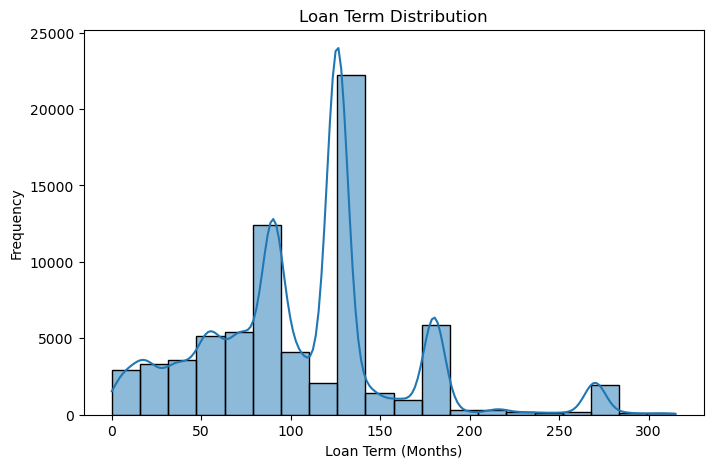

In [95]:
plt.figure(figsize=(8,5))
sns.histplot(df1["Loan_Term"],bins=20,kde=True)
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Frequency")
plt.show()

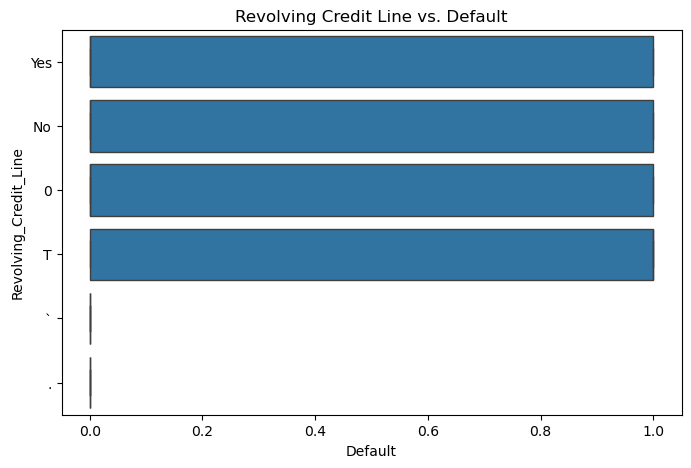

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Default',y='Revolving_Credit_Line',data=df1)
plt.title('Revolving Credit Line vs. Default')
plt.show()

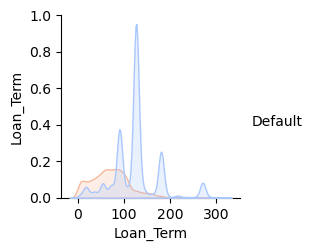

In [97]:
sel_col=["Loan_Term","Default"]
sns.pairplot(df1[sel_col],hue="Default",diag_kind="kde",palette="coolwarm")
plt.show()

In [98]:
label_encoder=LabelEncoder()

In [99]:
df1['Low_Documentation_Loan']=label_encoder.fit_transform(df1['Low_Documentation_Loan'])

In [100]:
df1['Revolving_Credit_Line']=label_encoder.fit_transform(df1['Revolving_Credit_Line'])

In [101]:
df1['Business']=label_encoder.fit_transform(df1['Business'])

In [102]:
df1['Demography']=label_encoder.fit_transform(df1['Demography'])

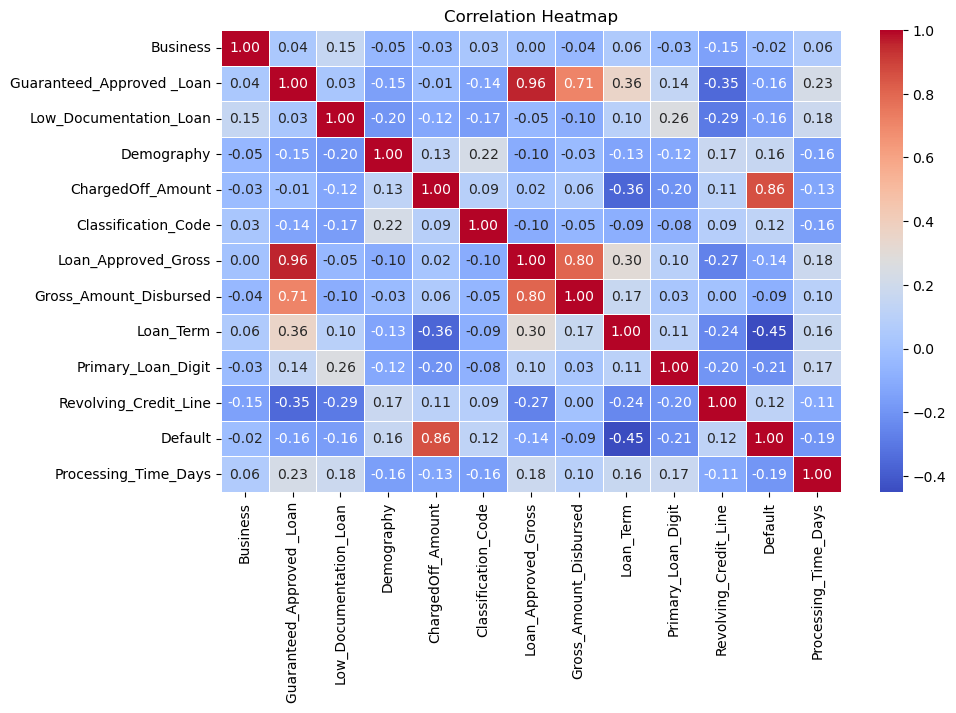

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [104]:
df1=df1.drop("Gross_Amount_Disbursed",axis=1)

In [105]:
y=df1[['Default']]

In [106]:
x=df1.drop("Default",axis=1)

In [107]:
x=x.drop("Loan_Approved_Gross",axis=1)

In [108]:
x=x.drop("Low_Documentation_Loan",axis=1)

In [109]:
scaler=MinMaxScaler()

In [110]:
x_scaled=scaler.fit_transform(x)

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [112]:
vif=pd.DataFrame()

In [113]:
vif['vif_values']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [114]:
vif['features']=x.columns

In [115]:
vif

,vif_values,features
0,6.701121,Business
1,2.651348,Guaranteed_Approved _Loan
2,5.321282,Demography
3,1.642076,ChargedOff_Amount
4,4.122162,Classification_Code
5,5.552837,Loan_Term
6,2.836459,Primary_Loan_Digit
7,4.606516,Revolving_Credit_Line
8,2.822914,Processing_Time_Days


In [116]:
df1["Low_Documentation_Loan"]=np.cbrt(df1["Low_Documentation_Loan"])

In [117]:
df1["ChargedOff_Amount"]=np.cbrt(df1["ChargedOff_Amount"])

In [118]:
df1["Loan_Approved_Gross"]=np.cbrt(df1["Loan_Approved_Gross"])

In [119]:
df1["Processing_Time_Days"]=np.cbrt(df1["Processing_Time_Days"])

In [120]:
df1["Business"]=np.cbrt(df1["Business"])

In [121]:
df1["Demography"]=np.log(df1["Demography"].max()+1-df1["Demography"])

In [122]:
df1["Demography"]=np.cbrt(df1["Demography"])

In [123]:
df1.skew()

Business                     0.311829
Guaranteed_Approved _Loan    1.403128
Low_Documentation_Loan       0.643877
Demography                   0.471627
ChargedOff_Amount            0.794714
Classification_Code         -0.402940
Loan_Approved_Gross          0.366721
Loan_Term                    0.655424
Primary_Loan_Digit           0.486898
Revolving_Credit_Line        0.411598
Default                      0.656826
Processing_Time_Days        -0.450809
dtype: float64

In [124]:
ln=LogisticRegression()

In [125]:
ln.fit(x_scaled,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [126]:
yln_pred=ln.predict(x_test)

In [127]:
yln_train_pred=ln.predict(x_train)

In [128]:
accuracyln=accuracy_score(y_test,yln_pred)

In [129]:
accuracyln

0.981696827908897

In [130]:
accuracylnt=accuracy_score(y_train,yln_train_pred)

In [131]:
accuracylnt

0.9821265761813834

In [132]:
classification=classification_report(y_test,yln_pred)

In [133]:
classification

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99      9585\n           1       0.98      0.96      0.97      4948\n\n    accuracy                           0.98     14533\n   macro avg       0.98      0.98      0.98     14533\nweighted avg       0.98      0.98      0.98     14533\n'

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
confusion_matrix(y_test,yln_pred)

array([[9500,   85],
       [ 181, 4767]])

In [136]:
kn=KNeighborsClassifier()

In [137]:
kn.fit(x_scaled,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [138]:
yk_pred=kn.predict(x_test)

In [139]:
accuracyknn=accuracy_score(y_test,yk_pred)

In [140]:
accuracyknn

0.9875455859079336

In [141]:
yk_train_pred=ln.predict(x_train)

In [142]:
accuracyknnt=accuracy_score(y_train,yk_train_pred)

In [143]:
accuracyknnt

0.9821265761813834

In [144]:
confusion_matrixknn=confusion_matrix(y_test,yk_pred)

In [145]:
confusion_matrixknn

array([[9499,   86],
       [  95, 4853]])

In [146]:
classificationknn=classification_report(y_test,yk_pred)

In [147]:
classificationknn

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      9585\n           1       0.98      0.98      0.98      4948\n\n    accuracy                           0.99     14533\n   macro avg       0.99      0.99      0.99     14533\nweighted avg       0.99      0.99      0.99     14533\n'

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [149]:
dt=DecisionTreeClassifier(max_depth=5,random_state=42)

In [150]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [151]:
ydt_pred=dt.predict(x_test)

In [152]:
dt_accuracy=accuracy_score(y_test,ydt_pred)

In [153]:
dt_accuracy

0.9918805477189844

In [154]:
ydtt_pred=dt.predict(x_train)

In [155]:
dtt_accuracy=accuracy_score(y_train,ydtt_pred)

In [156]:
dtt_accuracy

0.9927749393610982

In [157]:
confusion_matrixdt=confusion_matrix(y_test,ydt_pred)

In [158]:
confusion_matrixdt

array([[9491,   94],
       [  24, 4924]])

In [159]:
classificationdt=classification_report(y_test,ydt_pred)

In [160]:
classificationdt

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      9585\n           1       0.98      1.00      0.99      4948\n\n    accuracy                           0.99     14533\n   macro avg       0.99      0.99      0.99     14533\nweighted avg       0.99      0.99      0.99     14533\n'

In [161]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)

In [162]:
rf.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, random_state=42)

In [163]:
y_pred_rf=rf.predict(x_test)

In [164]:
rf_accuracy=accuracy_score(y_test,y_pred_rf)

In [165]:
rf_accuracy

0.9920181655542558

In [166]:
confusion_matrixrf=confusion_matrix(y_test,y_pred_rf)

In [167]:
confusion_matrixrf

array([[9491,   94],
       [  22, 4926]])

In [168]:
classificationrf=classification_report(y_test,y_pred_rf)

In [169]:
classificationrf

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      9585\n           1       0.98      1.00      0.99      4948\n\n    accuracy                           0.99     14533\n   macro avg       0.99      0.99      0.99     14533\nweighted avg       0.99      0.99      0.99     14533\n'

In [170]:
yt_pred_rf=rf.predict(x_train)

In [171]:
rft_accuracy=accuracy_score(y_train,yt_pred_rf)

In [172]:
rft_accuracy

0.9926373191584524